_Neural Data Science_

Lecturer: Dr. Jan Lause, Prof. Dr. Philipp Berens

Tutors: Jonas Beck, Fabio Seel, Julius Würzler

Summer term 2025

Student names: Luca Kosina, Max Bardelang, Sascha Mühlinghaus

LLM Disclaimer: Copilot for commenting.

# Coding Lab 1

## Introduction

In this coding lab you get to implement a pipeline for spike detection and feature extraction, as presented in the lecture:
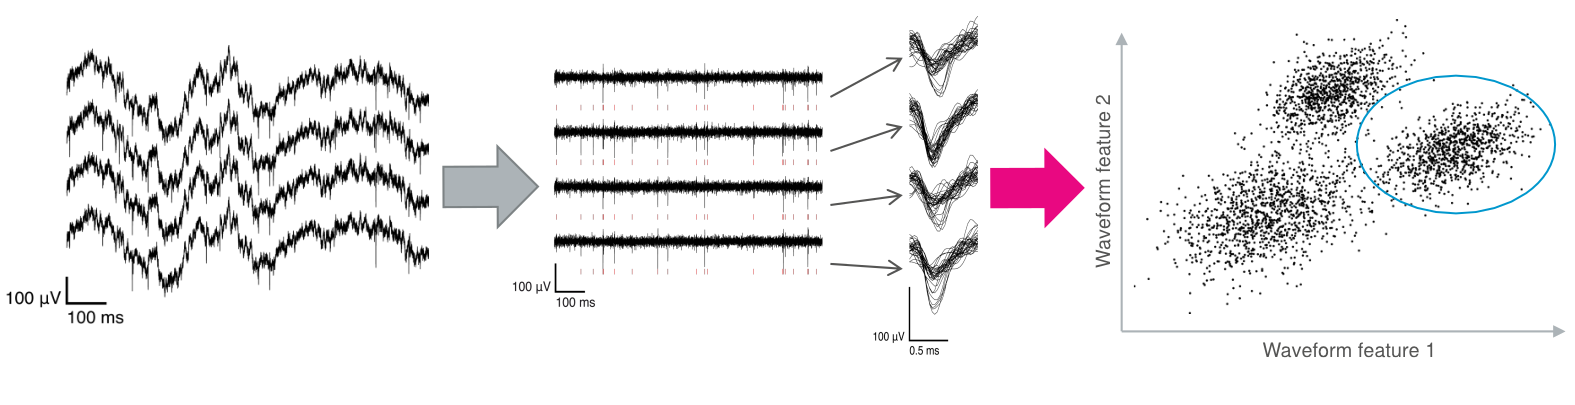

This will later be used for spike sorting (identifying which spike / waveform in the signal was caused by which neuron).

The data used in this notebook was recorded at 30kHz with a tetrode and thus contains the voltage traces of the 4 channels in μV.

_(for more information on the data acquisition, you can have a look at [Ecker et al 2014](https://doi.org/10.1016/j.neuron.2014.02.006), in particular the supplementary material. A similar pipeline is also used in [Ecker et al 2010](https://doi.org/10.1126/science.1179867). Note however that we only use a small portion of the data in this notebook and most of the experiment setup is not relevant here!)_

## Setup
- __Data__: Download the data file ```nds_cl_1.csv``` from ILIAS and save it in a subfolder ```../data/```.
- __Dependencies__: You don't have to use the exact versions of all the dependencies in this notebook, as long as they are new enough. But if you run "Run All" in Jupyter and the boilerplate code breaks, you probably need to upgrade them.


Recommended folder structure:

```
.
├── data/
│   └── nds_cl_1.csv
├── notebooks
│   └── CodingLab1.ipynb
├── matplotlib_style.txt
└── requirements.txt
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import PCA
from __future__ import annotations  # for Python 3.8 and below

# black is a code formatter (see https://github.com/psf/black).
# It will automatically format the code you write in the cells imposing consistent Python style.
%load_ext jupyter_black

%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p sklearn

Last updated: 2025-04-27 17:24:04CEST

Python implementation: CPython
Python version       : 3.11.11
IPython version      : 9.1.0

sklearn: 1.6.1

sklearn   : 1.6.1
matplotlib: 3.10.1
scipy     : 1.15.2
pandas    : 2.2.3
numpy     : 2.2.5

Watermark: 2.5.0



In [2]:
# matplotlib style file
# Template for style file: https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-style-sheets
plt.style.use("../matplotlib_style.txt")

## Load data

In [3]:
fs = 30000.0  # sampling rate of the signal in Hz
dt = 1 / fs
cols = ["Ch1", "Ch2", "Ch3", "Ch4"]
x = pd.read_csv("../data/nds_cl_1.csv", header=0, names=cols)

In [4]:
x.describe()

,Ch1,Ch2,Ch3,Ch4
count,1.920000e+07,1.920000e+07,1.920000e+07,1.920000e+07
mean,3.600331e+00,-8.850918e-01,2.864284e-01,2.210982e+00
std,5.824474e+02,6.014818e+02,6.464363e+02,6.126105e+02
min,-3.607000e+03,-3.739000e+03,-3.871000e+03,-3.750000e+03
25%,-3.460000e+02,-3.610000e+02,-3.950000e+02,-3.640000e+02
50%,1.200000e+01,8.000000e+00,-1.000000e+00,1.000000e+01
75%,3.650000e+02,3.720000e+02,4.010000e+02,3.810000e+02
max,2.873000e+03,3.004000e+03,3.099000e+03,3.017000e+03


## Task 1: Filter Signal

In order to detect action potentials, the first step is to filter out low frequency fluctuations (LFP) and high frequency noise. Determine appropriate filter settings and implement the filtering in the function ```filter_signal()```. A typical choice for this task would be a <mark>butterworth filter</mark>.

Plot a segment of the raw signal and the filtered signal for all four channels with matching y-axis. The segment you choose should contain spikes. When you apply the function also test different filter settings.

*Grading: 3 pts*


In [ ]:
## Current Best Practice
def filter_signal(
    x: pd.DataFrame, fs: float, low: float, high: float, order: int = 3
) -> pd.DataFrame:
    """Filter raw signal x.

    Parameters
    ----------

    x: pd.DataFrame, (n_samples, n_channels)
        Each column in x is one recording channel.

    fs: float
        Sampling frequency.

    low, high: float, float
        Passband in Hz for the butterworth filter.

    order: int
        The order of the Butterworth filter. Default is 3, but you should try
        changing this and see how it affects the results.


    Returns
    -------

    y: pd.DataFrame, (n_samples, n_channels)
        The filtered x. The filter delay is compensated in the output y.


    Notes
    ----

    1. Try exploring different filters and filter settings. More info:
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

    2. The output signal should be phase-shift compensated. More info:
    https://dsp.stackexchange.com/a/19086

    """
    # -----------------------------------------------------------------
    # implement a suitable filter and apply it to the input data (1pt)
    # -----------------------------------------------------------------

    # design Butterworth bandpass filter
    b, a = signal.butter(order, np.array([low, high]), btype="bandpass", fs=fs)

    # apply Butterworth filter
    y = pd.DataFrame(
        signal.filtfilt(b, a, x, axis=0), columns=("Ch1", "Ch2", "Ch3", "Ch4")
    )
    return y

In [ ]:
# passband 500-400Hz for comparison
xf = filter_signal(x, fs, 500, 4000, order=3)

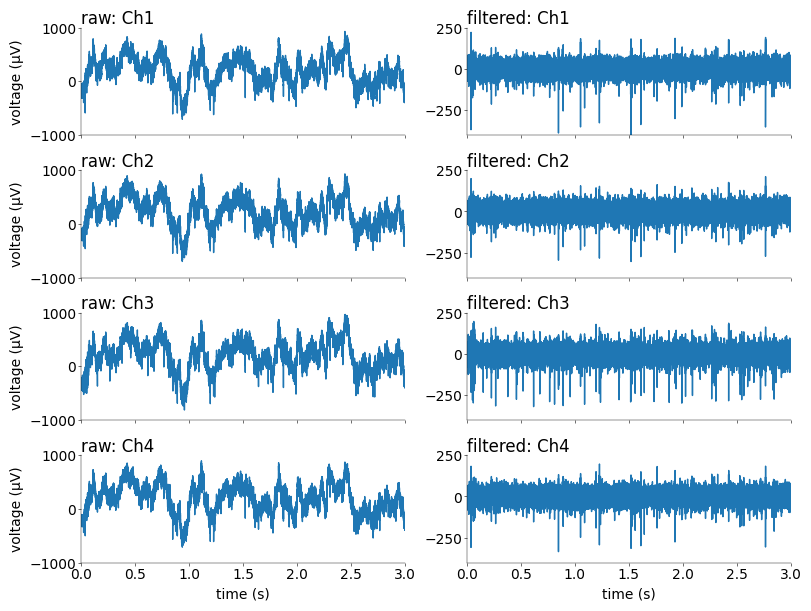

In [ ]:
mosaic = [
    ["raw: Ch1", "filtered: Ch1"],
    ["raw: Ch2", "filtered: Ch2"],
    ["raw: Ch3", "filtered: Ch3"],
    ["raw: Ch4", "filtered: Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# ------------------------------------------------------------------------------------
# Plot raw and filtered signals for all 4 channels and answer the questions (1+1 pts)
# ------------------------------------------------------------------------------------

T = int(fs * 3)
t = np.arange(0, T) * dt

for i, (raw, filtered) in enumerate(mosaic):

    # plot raw and filtered signals
    ax[raw].plot(t, x.iloc[:T, i])
    ax[filtered].plot(t, xf.iloc[:T, i])

    ax[raw].set_xlim((0, 3))
    ax[raw].set_ylim((-1000, 1000))

    ax[filtered].set_xlim((0, 3))
    ax[filtered].set_ylim((-400, 250))

    # Add labels and title
    ax[raw].set_ylabel("voltage (μV)")
    ax[raw].set_title(raw, loc="left")
    ax[filtered].set_title(filtered, loc="left")
    if i != 3:
        ax[raw].set_xticklabels([])
        ax[filtered].set_xticklabels([])
    else:
        ax[raw].set_xlabel("time (s)")
        ax[filtered].set_xlabel("time (s)")

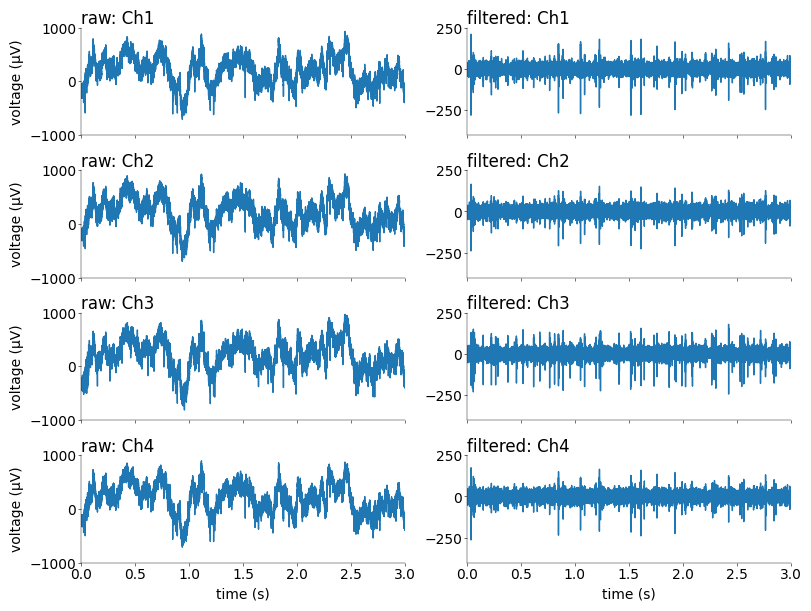

In [13]:
# passband 500-1500 Hz
xf = filter_signal(x, fs, 500, 1500, order=3)

mosaic = [
    ["raw: Ch1", "filtered: Ch1"],
    ["raw: Ch2", "filtered: Ch2"],
    ["raw: Ch3", "filtered: Ch3"],
    ["raw: Ch4", "filtered: Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# ------------------------------------------------------------------------------------
# Plot raw and filtered signals for all 4 channels and answer the questions (1+1 pts)
# ------------------------------------------------------------------------------------

T = int(fs * 3)
t = np.arange(0, T) * dt

for i, (raw, filtered) in enumerate(mosaic):

    # plot raw and filtered signals
    ax[raw].plot(t, x.iloc[:T, i])
    ax[filtered].plot(t, xf.iloc[:T, i])

    ax[raw].set_xlim((0, 3))
    ax[raw].set_ylim((-1000, 1000))

    ax[filtered].set_xlim((0, 3))
    ax[filtered].set_ylim((-400, 250))

    # Add labels and title
    ax[raw].set_ylabel("voltage (μV)")
    ax[raw].set_title(raw, loc="left")
    ax[filtered].set_title(filtered, loc="left")
    if i != 3:
        ax[raw].set_xticklabels([])
        ax[filtered].set_xticklabels([])
    else:
        ax[raw].set_xlabel("time (s)")
        ax[filtered].set_xlabel("time (s)")

### Questions
1) Explain your implementation: Which filter and parameters did you choose and why?

WHICH FILTER: The '''filtfilt()''' method filters the data such that there is no phase shift between the raw and filtered signal.

PASSBAND: Cutoff frequencies of the filter are orientied at the frequency of common action potentials and inspection of the data, which is between 500 and 4000Hz. Choosing a smaller bandwidth isolates the action potentials more clearly from noise in the signal, increasing Signal-To-Noise ratio but at the same time weaker action potentials may not be detected.

ORDER: The order = 3 we chose was the default, from trying this value yielded the best results. Lower values make a smoother filterung but capture more noise. Higher order ensures sharp cutoff.

2) Which parameters of the function can be adjusted, which are determined by the experiment setup? What is the effect of the adjustable parameters?

The sampling frequency is set by the experiment, while the filter’s passband and order are adjustable and determined by the experimental data. Outside the passband, the filter’s gain drops toward zero. The sharpness of this drop is controlled by the filter order, higher orders produce sharper cutoffs. Vice versa a lower order results in smoother cutoffs.

3) How does the filtered signal look compared to the original? Why is this helpful as preprocessing in our spike detection pipeline?

As compared to the raw data, the bandpass filtered data exhibits exhibits the remaining waves inbetween (500Hz and 4000Hz). Thereby, neural spikes are clearly detectable. Moreover, using the '''filtfilt()''' ensures that there is not phase delay in the filtered signal.

## Task 2: Detect action potentials

Action potentials are usually detected by finding large-amplitude deflections in the continuous signal. A good choice of threshold for detecting spikes is important. If it is too low, you will detect too many low amplitude events (noise); if it is too high, you run the risk of missing good spikes. Implement an automatic procedure to obtain a reasonable threshold and detect the times when spikes occurred in the function ```detect_spikes()```.

Plot a segment of the filtered signal for all four channels with matching y-axis and indicate the time points where you detected spikes, also **plot the threshold**.

*Grading: 4 pts*

In [14]:
def detect_spikes(
    x: np.ndarray, fs: float, N: int = 5, lockout: float = 1.0
) -> tuple[np.ndarray, np.ndarray, np.float64]:
    """Detect spikes in the signal x and compute a threshold.

    Parameters
    ----------

    x: np.array (n_samples, n_channels)
        The filtered signal from Task 1.

    fs: float
        the sampling rate (in Hz).

    N: int
        An arbitrary number with which you multiply with the standard deviation
        to set a threshold that controls your false positive rate. Default is 5
        but you should try changing it and see how it affects the results.

    lockout: float
        a window of 'refractory period', within which there's only one spike.
        Default is 1ms but you should also try changing it.


    Returns
    -------

    s: np.array, (n_spikes, )
        Spike location / index in the signal x.

    t: np.array, (n_spikes, )
        Spike time in ms. By convention the time of the zeroth sample is 0 ms.

    thrd: float
        Threshold = -N * sigma.


    Tips
    ----

    You can use scipy functions like find_peaks for the detection.
    Note: There are four channels in signal x.

    """
    # --------------------------------------------------------------
    # compute the robust s.d. and calculate the threshold (0.5 pts)
    # --------------------------------------------------------------

    # concat all 4 channels for calculating robust s.d.
    sigma = np.median(np.abs(x.flatten() - np.mean(x.flatten()))) / 0.6745
    thrd = N * sigma

    # lockout in samples
    lockout_samples = int((lockout / 1000.0) * fs)

    # --------------------------
    # find all spikes (1.5 pts)
    # --------------------------

    # create boolean array representing every timebin in each of the 4 channels
    spikes = np.zeros_like(xf.values)

    # find spikes in each channel and mark them in the boolean array
    for i in range(4):
        # flip signal to detect negative peaks
        peaks, _ = signal.find_peaks(
            -x[:, i],
            height=thrd,
            distance=lockout_samples,
        )

        spikes[peaks, i] = 1

    # combine spikes from 4 channels with logical OR
    s = np.argwhere(np.any(spikes, axis=1))
    t = s * (1000 / fs)  # convert to ms

    return s.flatten(), t.flatten(), thrd

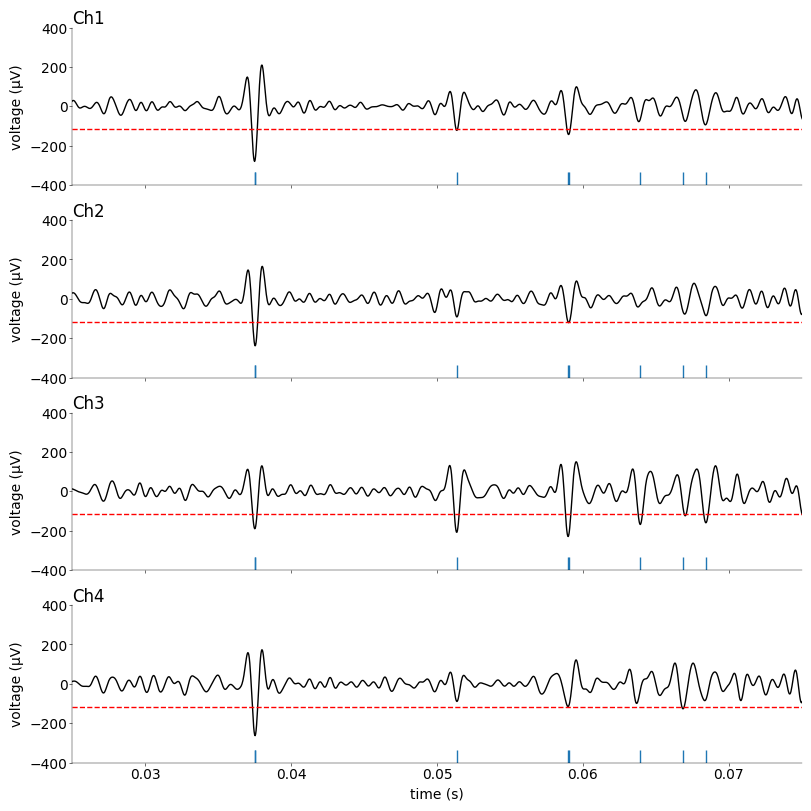

In [15]:
mosaic = [
    ["Ch1"],
    ["Ch2"],
    ["Ch3"],
    ["Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

# ------------------------------------------------------------------------------
# plot signal, threshold and detected spikes and answer the questions (1+1 pts)
# ------------------------------------------------------------------------------
s, t, thrd = detect_spikes(xf.values, 30000, N=5, lockout=1.5)

for i, col in enumerate(cols):

    data = xf[col].values
    # s, t_spikes, thrd = detect_spikes(data, fs, N=5, lockout=1.0)

    time = np.arange(len(data)) / fs
    # signal
    ax[col].plot(time, data, color="black", label="signal")
    # indicate threshold
    ax[col].axhline(-thrd, color="red", linestyle="--", label="threshold")
    # indicate spieks
    ax[col].vlines(s / fs, ymin=-400, ymax=-335, linewidth=1, label="spikes")
    ax[col].legend(loc="upper center")

    ax[col].set_ylim((-400, 400))
    ax[col].set_xlim((0.025, 0.075))
    ax[col].set_ylabel("voltage (μV)")

    ax[col].set_title(col, loc="left")

    if col != "Ch4":
        ax[col].set_xticklabels([])
    else:
        ax[col].set_xlabel("time (s)")

### Questions

1) Are the detected time points well aligned with prominent extrema in the signal? Also compare your detections across channels.

Yes, the extrema are detected correctly. Some extrema are only present or above threshold in one channel, in others the signal is too weak to be above threshold. For example, in channel 4, the detected spikes align well with the prominent peaks in the filtered signal. However, in other channels like Channel 1 or Channel 2, the same extrema may not cross the threshold due to lower amplitude, which shows that the channel specific detection works.

2) Take one feature of the spikes and explain how that can help us identifying the source neuron of a spike (only based on visual examination of the plot).

Because of positively charged sodium ions entering the neuron during depolarization a local field potential (LFP) is created. The difference in amplitude of the LFP across channels can tell us which channel is closest or farthest away from a neuron.  This spatial arrangement helps to identify the source neuron of a spike, as the amplitude of the spike is typically largest in the channel closest to the neuron . 

## Task 3: Extract waveforms
For later spike sorting we need the waveforms of all detected spikes. Extract the waveforms segments (1 ms) on all four channels for each spike time (as a result each spike is represented by a 4x30 element matrix). Implement this procedure in the function ```extract_waveforms()```.

Plot (a) the first 100 spikes you detected and (b) the 100 largest spikes you detected.
Are there a lot of very small spikes (likely noise) among your detected spikes? If so your threshold may be too low. Can you see obvious artifacts, not looking like spikes at all?

*Grading: 3 pts*

In [16]:
def extract_waveforms(x: np.ndarray, s: np.ndarray) -> np.ndarray:
    """Extract spike waveforms at times s (given in samples)
    from the filtered signal `xf` using a fixed window around the
    times of the spikes.

    Parameters
    ----------

    x: np.array (n_samples, n_channels)
        The filtered signal.

    s: np.array, (n_spikes, )
        Spike time in samples.


    Return
    ------

    w: np.array, (n_spikes, length_window, n_channels)
        Waveforms. (You don't have to get the exact same
        shape as we noted here. It's just the shape of w
        that can be easily retrieved via broadcasting.)


    Notes
    -----

    More on Numpy Broadcasting
    https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

    """
    # -------------------------------
    # extract spike waveforms (1 pt)
    # -------------------------------
    # slice x with index windows of size 30
    return x[s[:, np.newaxis] - 15 + np.arange(30), :]

Plot first 100 spike waveforms

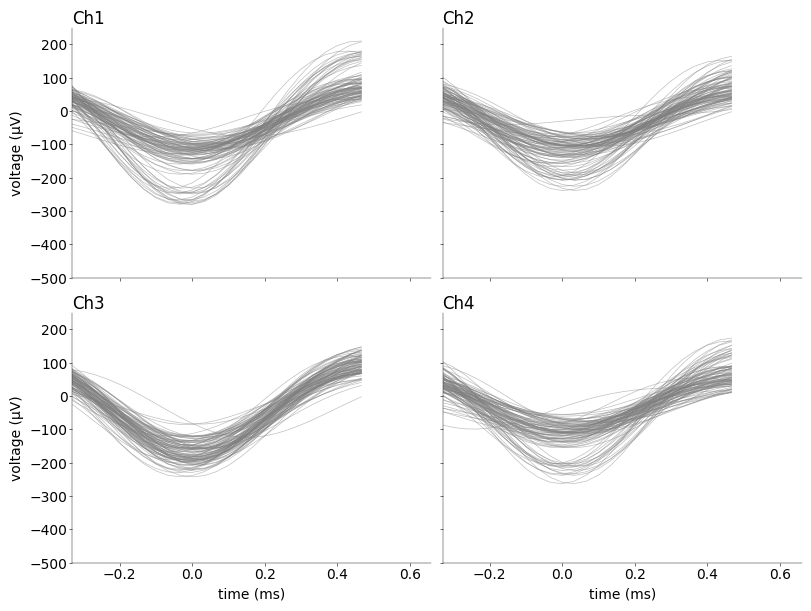

In [17]:
# ---------------------------------------------------------------------
# plot first and largest 100 spikes and answer the questions (1+1 pts)
# ---------------------------------------------------------------------

# first 100 spikes

mosaic = [
    ["Ch1", "Ch2"],
    ["Ch3", "Ch4"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)

# extract waveforms
w = extract_waveforms(xf.values, s)
# select first 100 spikes
first_100_spikes = w[:100, :, :]

time_axis = (
    (np.arange(first_100_spikes.shape[1]) - first_100_spikes.shape[1] // 2) * 1000 / fs
)  # in ms

fig.suptitle("First 100 spikes")
for i, col in enumerate(cols):
    ax[col].plot(
        time_axis, first_100_spikes[:, :, i].T, color="gray", lw=0.5, alpha=0.5
    )

    # labeling etc
    ax[col].set_ylim((-500, 250))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage (μV)")
    else:
        ax[col].set_yticklabels([])

Plot largest 100 spike waveforms

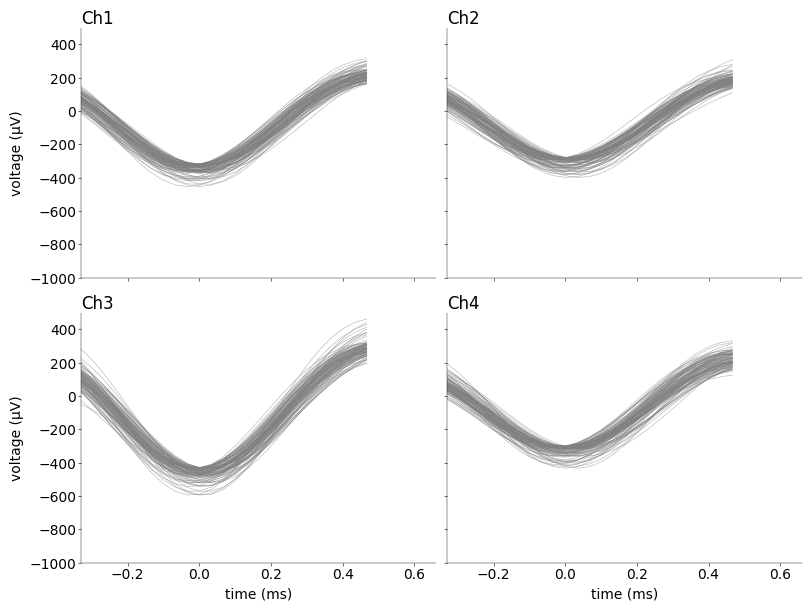

In [18]:
# largest 100 spikes
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 6), layout="constrained", dpi=100
)
fig.suptitle("Largest 100 spikes")
for i, col in enumerate(cols):
    largest_100_spikes = np.argpartition(xf.values[s, i], 100, axis=0)[:100]
    ax[col].plot(
        time_axis, w[largest_100_spikes][:, :, i].T, color="gray", lw=0.5, alpha=0.5
    )

    # labeling etc
    ax[col].set_ylim((-1000, 500))
    ax[col].set_xlim((-0.33, 0.66))
    ax[col].set_title(col, loc="left")
    if col == "Ch3" or col == "Ch4":
        ax[col].set_xlabel("time (ms)")
    else:
        ax[col].set_xticklabels([])
    if col == "Ch1" or col == "Ch3":
        ax[col].set_ylabel("voltage (μV)")
    else:
        ax[col].set_yticklabels([])

### Questions

1) Describe the shape of the spikes.

The waveforms are typical for a neuronal spike recorded extracellularly, where the spikes generally have a peak downwards, followed by a return to baseline. The waveforms are biphasic. In Ch1, Ch2 and Ch4 (in the first 100 spikes plot) there seems to be another type of spike that shows overshooting from hyperpolarization. 


2) Do the waveforms tend to be similar? If spikes have a similar waveform, what could that mean - and what does it mean if the waveforms look different?

The waveforms generally tend to be homogeneous, with the two shapes described in 1). Similar waveforms likely originate from the same neuron, while different shapes could indicate two different neurons recorded with the Tetrode. In a broader context, the results may indicate that less strong artefacts have been removed and that only few neural spikes close to the tetrode have been detected.

## Task 4: Extract features using PCA
Compute the first three PCA features on each channel separately in ```extract_features()```. You can use a available PCA implementation or implement it yourself. After that, each spike is represented by a 12 element vector. Compute the fraction of variance captured by these three PCs. Also return the obtained parameters of the PCA

For one channel, plot the mean and the first three principal axes as calculated by the PCA in the feature space. Interprete them in light of the plots in the previous tasks.

For all pairwise combinations of channels, plot the resulting features of the 1st PCs as scatter plots against each other. Do you see clusters visually?

*Grading: 6 pts*

## PCA
### Questions (1 pt)
1) If we input the data from each channel separately to a PCA, what are the feature dimension of the input?

The feature dimensions of the PCA input of one channel are the timepoints and waveforms given the size of the window. In our case precisely (32857, 30).

2) Therefore, what do the Principal Axes the PCA computes represent?

Idiosyncratic patterns of voltage over time, namely those patterns that explain the most variance in the feature space. The PCs are uncorrelated and represent the variance between different spikes.

3) Does it make sense to apply preprocessing steps, such as normalization? Have a look at the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). What is applied by default?

Yes, PCA finds the axis along which the data has the most variance. If one feature has higher variance than another, the principal components will align more strongly with that feature. If this effect becomes too pronounced, more subtle but equally informative differences in the "raw" data may not be well represented.  

By default, the scikit implementation centers the features but does not scale them. We assume every timepoint during the spike to be equally important to the characteristic of the waveform. Hence,  it is useful to normalize the data.

In [ ]:
# as described in the tutorial, fix seed for repreducibility
import random
random.seed(10)

In [ ]:
def extract_features(w: np.ndarray) -> np.ndarray:
    """Extract features for spike sorting from the waveforms w.

    Do PCA on the waveforms of each channel separately,
    then concatenate the first three principal components
    of each channels into one numpy array (`b`).


    Parameter
    ---------

    w: np.ndarray, (n_spikes, length_window, n_channels)
        Waveforms from Task 3.


    Return
    ------

    b: np.ndarray, (n_spikes, n_feature)
        the transformed data
    means: np.ndarray, (n_channels, length_window)
        means per channel
    principal_components: np.ndarray, (n_channels, 3, length_window)
        the 'principal axes' obtained by the pca


    Notes
    -----

    You can use PCA from sklearn.

    More on PCA
    https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

    """

    # ----------------------------------------------
    # obtain first 3 principle components (1.5 pts)
    # ----------------------------------------------
    pca1, pca2, pca3, pca4 = (
        PCA(n_components=3),
        PCA(n_components=3),
        PCA(n_components=3),
        PCA(n_components=3),
    )
    # transform data using the first 3 principal components
    # and reshape to (n_spikes, n_channels, length_window)
    b = (
        np.array(
            [
                pca1.fit_transform(w[:, :, 0]),
                pca2.fit_transform(w[:, :, 1]),
                pca3.fit_transform(w[:, :, 2]),
                pca4.fit_transform(w[:, :, 3]),
            ]
        )
        .transpose((1, 2, 0))
        .reshape((w.shape[0], -1))
    )

    # obtain mean waveform across channels
    means = w.mean(axis=0)
    # obtain first 3 principal components
    principal_components = np.array(
        [pca1.components_, pca2.components_, pca3.components_, pca4.components_]
    )

    # -----------------------------------------------------------------------------------------------------
    # Print the fraction of variance explained by the three components combined for each channel (0.5 pts)
    # -----------------------------------------------------------------------------------------------------

    # bottom of y-axis
    btm = 0.9

    # explained variance array for each channel
    explained_variances = [
        pca1.explained_variance_ratio_.sum(),
        pca2.explained_variance_ratio_.sum(),
        pca3.explained_variance_ratio_.sum(),
        pca4.explained_variance_ratio_.sum(),
    ]

    cols = [0, 1, 2, 3]  # x-positions

    _, ax = plt.subplots()

    # create barplot with explained variance of first 3 PCs for each channel
    ax.bar(
        cols,
        np.array(explained_variances) - btm,
        width=0.2,
        bottom=btm,
    )

    # plot horizontal lines for explained variance
    for i, ev in enumerate(explained_variances):
        ax.hlines(y=ev, xmin=-0.5, xmax=i, linestyles="dashed", colors="red")

    # optional: beautify
    ax.set_xlim(-0.6, max(cols) + 0.5)

    ax.set_ylabel("explained variance ratio")
    ax.set_title(
        "Total explained variance by first three Principal Components of waveform-timelines"
    )

    return b, means, principal_components

In [ ]:
# feature dimensions of PCA input
w.shape

(32857, 30, 4)

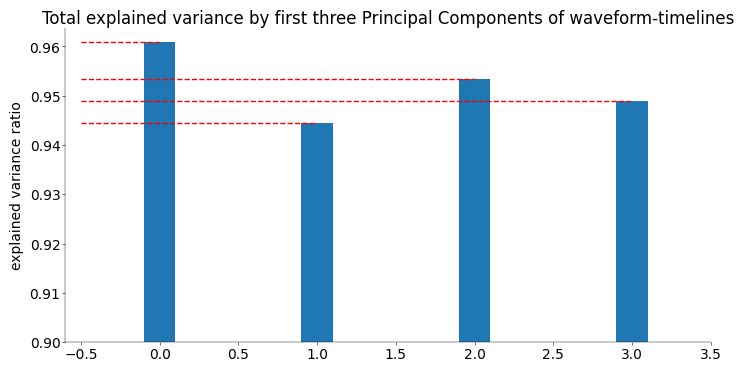

In [52]:
# call extract features function
b, means, principal_components = extract_features(w)

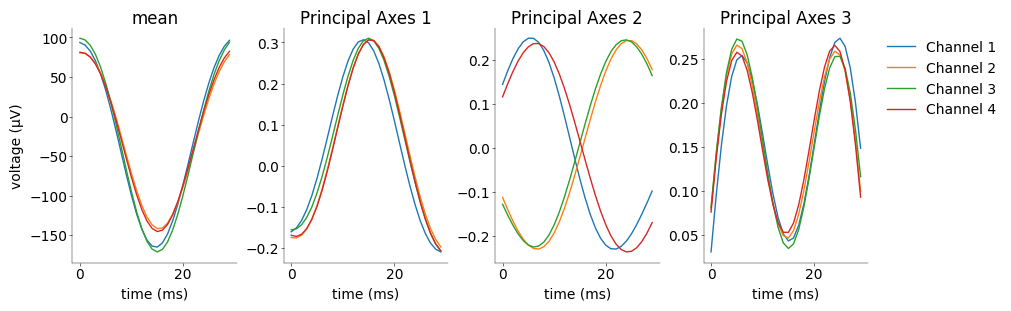

In [ ]:
# ------------------------------------------------------------------------------------------------------------------
# Plot the mean of each channel and the three principal axes obtained by the PCA and answer the questions (1+1 pts)
# ------------------------------------------------------------------------------------------------------------------

mosaic = [
    ["mean", "Principal Axes 1", "Principal Axes 2", "Principal Axes 3"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(10, 3), layout="constrained", dpi=100
)

# plot mean waveform for each channel
ax["mean"].plot(means)
# plot first 3 PCs for each channel
ax["Principal Axes 1"].plot(principal_components[:, 0, :].T)
ax["Principal Axes 2"].plot(principal_components[:, 1, :].T)
ax["Principal Axes 3"].plot(principal_components[:, 2, :].T)

# labeling 
for channel in range(4):
    for i, mo in enumerate(np.ravel(mosaic)):
        ax[mo].set_xlabel("time (ms)")
        ax[mo].set_title(mo)

ax[mosaic[0][0]].set_ylabel("voltage (μV)")
# legend
ax[mosaic[0][-1]].legend(
    ["Channel " + str(i + 1) for i in range(4)],
    bbox_to_anchor=(1.04, 1),
    loc="upper left",
)
plt.show()

### Questions

NOTE: The task was not completely clear to us. We were not sure whether to plot PCs/mean for all or just one channel. There were contradicting indications. Here we just go with all channels.

1) Compare the plot to the plots of the other tasks. What do you observe?

The previous plots showed detected spike waveforms from filtered data over time, the given PCA plots cature the largest variance in the waveform of spikes over time. All principal components are almost identical across channels, with the exception of short time delays and small differences in amplitude.
Most prominently in PA2, but also to a lesse extend in the plot for the means and PA1, channels 2&4 and channels 1&3 seem to group together.

2) What does the mean look like? Does this match your expectations?

Generally, the mean shows a strong extracellulary recorded depolarization, as indicated by the descent. Before and after the spike we can see that the slope is less pronounced. The mean roughly matches the shape of a neural spike with de and reperpolarization. Yet, hyperpolarization is not clearly visible which may indicate that this differs across spikes. The overall shape is expected, the difference in amplitude is unexpected but not surprising: A spike signal gets attenuated in amplitude as it travells across space, and the tetrodes are at different spatial locations. 

3) Explain what it means if a spike has a high value in the first dimension. What is the effect of the other dimensions?

A high value in the first dimension corresponds to a larger spike amplitude, this can be understood as this component being multiplied with a high scalar before being combined with the other components to the final waveform. The other components reflect finer grained shapes (since also the first components explaines the most variance) in the waveform of the spikes, potentially corresponding the before mentioned differences in hyperpolarisation and other factors.  

Text(0.5, 0.98, 'Pairwise 1st PCs')

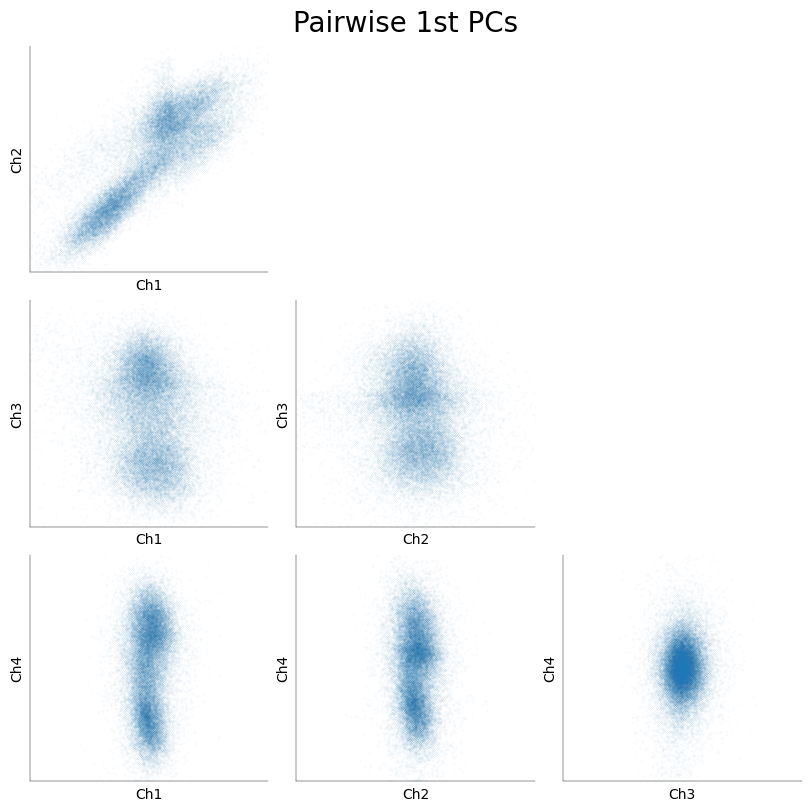

In [ ]:
# ----------------------------------------------------------------------------------------------------------
# Create a scatterplot of the projections of the spikes for all pairwise combinations of the 1st PCs (1 pt)
# ----------------------------------------------------------------------------------------------------------

mosaic = [
    ["Ch2 vs Ch1", ".", "."],
    ["Ch3 vs Ch1", "Ch3 vs Ch2", "."],
    ["Ch4 vs Ch1", "Ch4 vs Ch2", "Ch4 vs Ch3"],
]
fig, ax = plt.subplot_mosaic(
    mosaic=mosaic, figsize=(8, 8), layout="constrained", dpi=100
)

# index of the 1st PC in `b`
i = {"Ch1": 0, "Ch2": 3, "Ch3": 6, "Ch4": 9}

for mo in np.ravel(mosaic):
    if mo == ".":
        continue
    y, x = mo.split(" vs ")
    ax[mo].scatter(b[:, i[y]], b[:, i[x]], s=0.003, alpha=0.8)

    ax[mo].set_xlabel(x)
    ax[mo].set_ylabel(y)
    ax[mo].set_xlim((-500, 500))
    ax[mo].set_ylim((-500, 500))
    ax[mo].set_xticks([])
    ax[mo].set_yticks([])

fig.suptitle("Pairwise 1st PCs", fontsize=20)

In [ ]:
# save data for the next Coding Lab

# np.save("../data/nds_cl_1_features", b)
# np.save("../data/nds_cl_1_spiketimes_s", s)
# np.save("../data/nds_cl_1_spiketimes_t", t)
# np.save("../data/nds_cl_1_waveforms", w)